In [55]:
import os
from loguru import logger
from federated_learning.arguments import Arguments
from federated_learning.dimensionality_reduction import calculate_pca_of_gradients
from federated_learning.parameters import get_layer_parameters
from federated_learning.parameters import calculate_parameter_gradients
from federated_learning.utils import get_model_files_for_epoch
from federated_learning.utils import get_model_files_for_suffix
from federated_learning.utils import apply_standard_scaler
from federated_learning.utils import get_poisoned_worker_ids_from_log
from federated_learning.utils import get_worker_num_from_model_file_name
from client import Client
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

%matplotlib inline


args = Arguments(logger)
args.log() 

SAVE_SIZE = (18, 14)

MODELS_PATH = 'results/Nz_CIFAR_2/NzCIFAR_2_2010_models/'
EXP_INFO_PATH = 'results/Nz_CIFAR_2/NzCIFAR_2_2010.log'

EPOCHS = list(range(10, 200))
LAYER_NAME = "fc2.weight"

CLASS_NUM = 2
POISONED_WORKER_IDS = get_poisoned_worker_ids_from_log(EXP_INFO_PATH, line_num=32)
MODEL_FILES = sorted(os.listdir(MODELS_PATH))

SAVE_NAME = "defense_results.jpg"
SAVE_SIZE = (18, 14)

2020-11-30 02:05:51.954 | DEBUG    | federated_learning.arguments:log:193 - Arguments: 
Batch Size: 10
Test Batch Size: 1000
Epochs: 200
Learning Rate: 0.01
Momentum: 0.5
CUDA Enabled: False
Shuffle Enabled: False
Log Interval: 100
Scheduler Step Size: 50
Scheduler Gamma: 0.5
Scheduler Minimum Learning Rate: 1e-10
Client Selection Strategy: None
Client Selection Strategy Arguments: null
Model Saving Enabled: True
Model Saving Interval: 1
Model Saving Path (Relative): models
Epoch Save Start Prefix: start
Epoch Save End Suffix: end
Number of Clients: 20
Number of Poisoned Clients: 10
NN: <class 'federated_learning.nets.cifar_10_cnn.Cifar10CNN'>
Train Data Loader Path: data_loaders/cifar10/train_data_loader.pickle
Test Data Loader Path: data_loaders/cifar10/test_data_loader.pickle
Loss Function: <class 'torch.nn.modules.loss.CrossEntropyLoss'>
Default Model Folder Path: default_models
Data Path: data



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


In [57]:
def load_models(args, model_filenames):
    clients = []
    for model_filename in model_filenames:
        client = Client(args, 0, None, None)
        client.set_net(client.load_model_from_file(model_filename))

        clients.append(client)

    return clients

def plot_gradients_2d(gradients):
    fig = plt.figure()

    for (worker_id, gradient) in gradients:
        if worker_id in POISONED_WORKER_IDS:
            plt.scatter(gradient[0], gradient[1], color="blue", s=100)
        else:
            plt.scatter(gradient[0], gradient[1], color="orange", s=180)
    
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='Poisoned', markerfacecolor='blue', markersize=15),
               Line2D([0], [0], marker='o', color='w', label='Benign', markerfacecolor='orange', markersize=15)
              ]
    fig.set_size_inches(SAVE_SIZE, forward=False)
    fig.legend(handles=legend_elements, loc='upper right')
    plt.grid(False)
    plt.margins(0,0)
    


    # Create the figure
    fig, ax = plt.subplots()
    
#     plt.legend()
    plt.savefig(SAVE_NAME, bbox_inches='tight', pad_inches=0.1)
    plt.title('Noise FMNIST - Class 6 | Blue : Malicious | Orange : Benign')

2020-11-30 02:05:52.571 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:05:52.593 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:05:52.600 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:05:52.601 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:05:52.620 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:05:52.629 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:05:52.630 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_p

2020-11-30 02:05:53.086 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:05:53.104 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:05:53.110 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:05:53.110 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:05:53.126 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:05:53.133 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:05:53.134 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_p

2020-11-30 02:05:53.553 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:05:53.554 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:05:53.570 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:05:53.575 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:05:53.576 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:05:53.591 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:05:53.596 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_p

2020-11-30 02:05:53.990 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:05:53.990 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:05:54.006 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:05:54.012 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:05:54.012 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:05:54.030 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:05:54.051 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU t

2020-11-30 02:05:54.437 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:05:54.443 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:05:54.444 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:05:54.463 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:05:54.470 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:05:54.471 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:05:54.486 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU t

2020-11-30 02:05:54.920 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:05:54.927 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:05:54.928 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:05:54.947 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:05:54.969 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:05:54.974 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:05:54.975 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_p

2020-11-30 02:05:55.391 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:05:55.403 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:05:55.409 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:05:55.409 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:05:55.422 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:05:55.427 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:05:55.427 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_p

2020-11-30 02:05:55.820 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:05:55.833 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:05:55.855 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:05:55.861 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:05:55.862 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:05:55.879 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:05:55.886 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_p

2020-11-30 02:05:56.343 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:05:56.343 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:05:56.358 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:05:56.367 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:05:56.367 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:05:56.380 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:05:56.387 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_p

2020-11-30 02:05:56.951 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:05:56.961 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:05:56.962 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:05:56.986 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:05:56.996 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:05:56.996 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:05:57.018 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU t

2020-11-30 02:05:57.498 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:05:57.508 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:05:57.508 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:05:57.524 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:05:57.533 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:05:57.534 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:05:57.547 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU t

2020-11-30 02:05:58.027 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:05:58.040 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:05:58.048 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:05:58.049 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:05:58.061 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:05:58.071 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:05:58.071 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_p

2020-11-30 02:05:58.531 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:05:58.546 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:05:58.554 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:05:58.554 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:05:58.567 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:05:58.589 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:05:58.598 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_p

2020-11-30 02:05:59.030 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:05:59.030 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:05:59.043 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:05:59.052 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:05:59.053 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:05:59.068 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:05:59.077 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_p

2020-11-30 02:05:59.579 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:05:59.580 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:05:59.600 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:05:59.629 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:05:59.639 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:05:59.640 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:05:59.656 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU t

2020-11-30 02:06:00.178 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:00.187 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:00.188 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:00.205 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:00.216 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:00.218 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:00.234 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU t

2020-11-30 02:06:00.725 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:00.745 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:00.754 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:00.755 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:00.769 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:00.777 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:00.777 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_p

2020-11-30 02:06:01.233 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:01.247 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:01.256 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:01.256 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:01.269 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:01.277 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:01.278 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_p

2020-11-30 02:06:01.797 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:01.797 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:01.812 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:01.822 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:01.822 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:01.835 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:01.844 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_p

2020-11-30 02:06:02.306 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:02.306 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:02.322 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:02.327 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:02.328 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:02.342 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:02.362 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU t

2020-11-30 02:06:02.855 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:02.861 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:02.862 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:02.878 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:02.885 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:02.885 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:02.903 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU t

2020-11-30 02:06:03.445 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:03.452 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:03.452 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:03.470 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:03.491 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:03.497 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:03.498 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_p

2020-11-30 02:06:03.934 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:03.947 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:03.953 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:03.954 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:03.967 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:03.973 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:03.973 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_p

2020-11-30 02:06:04.373 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:04.389 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:04.406 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:04.412 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:04.413 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:04.429 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:04.435 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_p

2020-11-30 02:06:04.835 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:04.836 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:04.848 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:04.853 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:04.854 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:04.865 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:04.871 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_p

2020-11-30 02:06:05.303 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:05.308 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:05.309 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:05.328 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:05.334 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:05.335 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:05.351 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU t

2020-11-30 02:06:05.754 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:05.760 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:05.761 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:05.778 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:05.784 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:05.785 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:05.797 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU t

2020-11-30 02:06:06.180 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:06.195 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:06.200 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:06.201 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:06.213 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:06.219 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:06.219 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_p

2020-11-30 02:06:06.613 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:06.627 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:06.632 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:06.633 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:06.651 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:06.672 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:06.677 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_p

2020-11-30 02:06:07.041 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:07.042 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:07.057 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:07.062 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:07.063 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:07.077 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:07.083 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_p

2020-11-30 02:06:07.495 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:07.496 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:07.509 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:07.525 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:07.531 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:07.531 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:07.546 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU t

2020-11-30 02:06:08.013 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:08.022 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:08.023 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:08.041 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:08.048 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:08.048 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:08.067 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU t

2020-11-30 02:06:08.474 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:08.497 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:08.503 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:08.504 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:08.520 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:08.527 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:08.528 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_p

2020-11-30 02:06:08.925 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:08.938 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:08.944 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:08.944 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:08.960 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:08.966 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:08.967 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_p

2020-11-30 02:06:09.459 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:09.461 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:09.476 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:09.485 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:09.485 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:09.505 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:09.512 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_p

2020-11-30 02:06:10.017 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:10.018 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:10.039 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:10.046 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:10.046 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:10.069 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:10.095 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU t

2020-11-30 02:06:10.607 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:10.614 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:10.614 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:10.632 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:10.639 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:10.640 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:10.658 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU t

2020-11-30 02:06:11.171 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:11.178 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:11.179 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:11.197 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:11.219 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:11.226 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:11.227 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_p

2020-11-30 02:06:11.772 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:11.789 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:11.796 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:11.797 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:11.816 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:11.826 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:11.827 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_p

2020-11-30 02:06:12.351 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:12.374 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:12.401 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:12.408 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:12.409 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:12.427 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:12.434 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_p

2020-11-30 02:06:12.910 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:12.911 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:12.932 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:12.939 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:12.940 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:12.959 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:12.967 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_p

2020-11-30 02:06:13.505 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:13.513 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:13.513 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:13.529 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:13.537 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:13.537 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:13.553 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU t

2020-11-30 02:06:14.088 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:14.095 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:14.096 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:14.115 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:14.123 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:14.123 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:14.145 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU t

2020-11-30 02:06:14.669 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:14.686 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:14.693 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:14.694 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:14.711 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:14.719 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:14.719 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_p

2020-11-30 02:06:15.208 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:15.228 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:15.234 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:15.235 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:15.252 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:15.276 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:15.283 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_p

2020-11-30 02:06:15.762 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:15.763 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:15.782 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:15.788 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:15.789 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:15.808 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:15.814 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_p

2020-11-30 02:06:16.304 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:16.305 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:16.326 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:16.347 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:16.353 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:16.354 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:16.369 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU t

2020-11-30 02:06:16.865 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:16.872 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:16.873 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:16.893 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:16.901 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:16.901 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:16.919 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU t

2020-11-30 02:06:17.416 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:17.438 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:17.445 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:17.446 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:17.465 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:17.473 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:17.473 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_p

2020-11-30 02:06:17.985 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:18.005 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:18.011 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:18.012 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:18.031 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:18.038 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:18.039 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_p

2020-11-30 02:06:18.578 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:18.579 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:18.593 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:18.600 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:18.601 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:18.615 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:18.622 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_p

2020-11-30 02:06:19.115 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:19.116 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:19.137 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:19.144 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:19.145 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:19.166 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:19.192 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU t

2020-11-30 02:06:19.739 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:19.746 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:19.747 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:19.766 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:19.773 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:19.774 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:19.795 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU t

2020-11-30 02:06:20.266 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:20.273 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:20.274 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 128
2020-11-30 02:06:20.294 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:20.320 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 02:06:20.326 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 128
2020-11-30 02:06:20.326 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_p

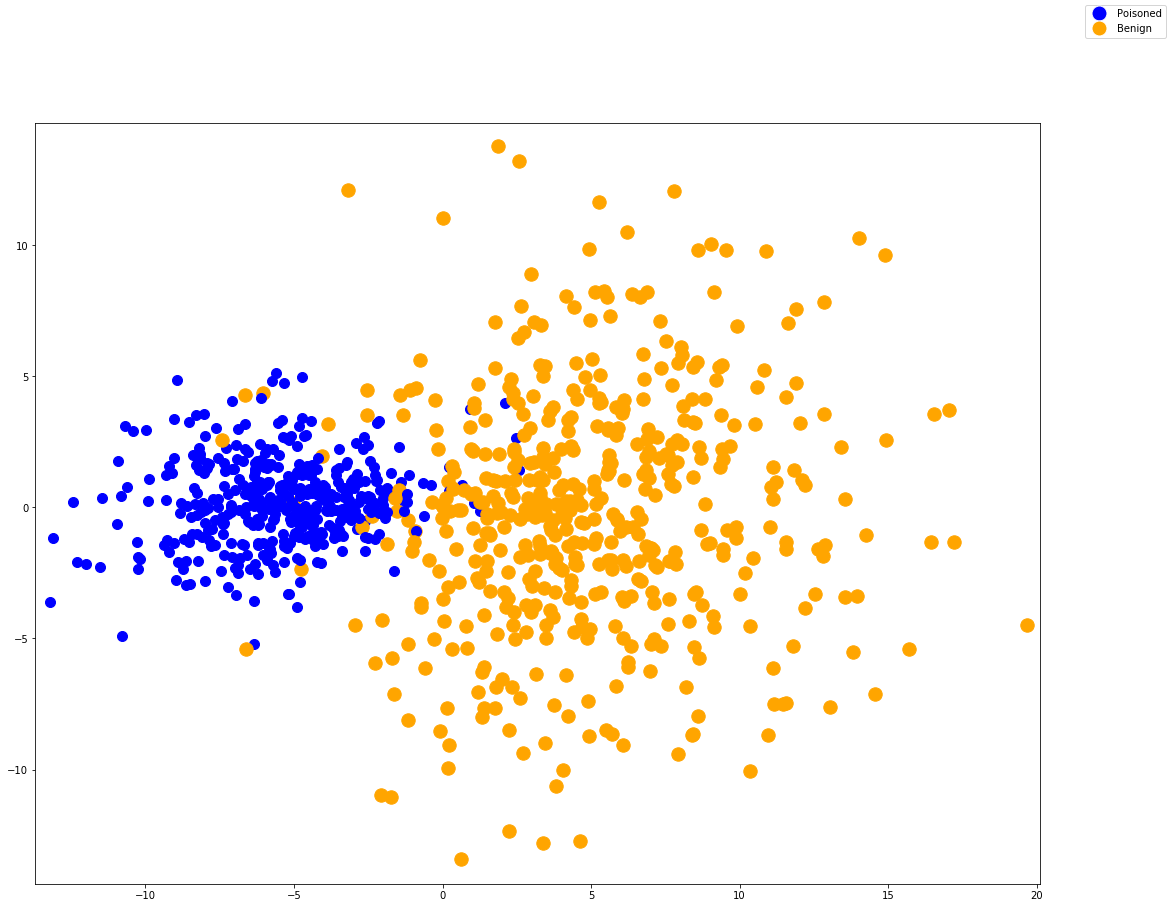

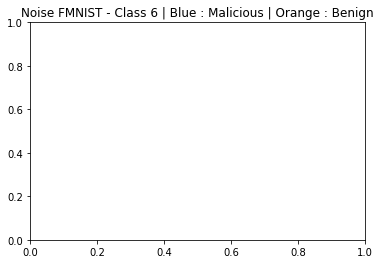

In [58]:
param_diff = []
worker_ids = []

for epoch in EPOCHS:
    start_model_files = get_model_files_for_epoch(MODEL_FILES, epoch)
    start_model_file = get_model_files_for_suffix(start_model_files, args.get_epoch_save_start_suffix())[0]
    start_model_file = os.path.join(MODELS_PATH, start_model_file)
    start_model = load_models(args, [start_model_file])[0]
    start_model_layer_param = list(get_layer_parameters(start_model.get_nn_parameters(), LAYER_NAME)[CLASS_NUM])
    
    end_model_files = get_model_files_for_epoch(MODEL_FILES, epoch)
    end_model_files = get_model_files_for_suffix(end_model_files, args.get_epoch_save_end_suffix())
    
    for end_model_file in end_model_files:
        worker_id = get_worker_num_from_model_file_name(end_model_file)
        end_model_file = os.path.join(MODELS_PATH, end_model_file)
        end_model = load_models(args, [end_model_file])[0]
        
        end_model_layer_param = list(get_layer_parameters(end_model.get_nn_parameters(), LAYER_NAME)[CLASS_NUM])
        
        gradient  = calculate_parameter_gradients(logger, start_model_layer_param, end_model_layer_param)
        gradient = gradient.flatten()
        
        param_diff.append(gradient)
        worker_ids.append(worker_id)
    
    

# logger.info("Gradients shape: ({}, {})".format(len(param_diff), param_diff[0].shape[0]))

# logger.info("Prescaled gradients: {}".format(str(param_diff)))
scaled_param_diff = apply_standard_scaler(param_diff)
# logger.info("Postscaled gradients: {}".format(str(scaled_param_diff)))
dim_reduced_gradients = calculate_pca_of_gradients(logger, scaled_param_diff, 2)
# logger.info("PCA reduced gradients: {}".format(str(dim_reduced_gradients)))

# logger.info("Dimensionally-reduced gradients shape: ({}, {})".format(len(dim_reduced_gradients), dim_reduced_gradients[0].shape[0]))

plot_gradients_2d(zip(worker_ids, dim_reduced_gradients))


